In [13]:
%matplotlib inline
import numpy as np
import rasterio
import os as os
import matplotlib.pyplot as plt

In [9]:
# Read raster bands directly to Numpy arrays.
#
folder = '/home/amirhossein/Desktop/hack/planet_stanford_images/20180120_184634_0f36'
name = '20180120_184634_0f36_3B_AnalyticMS.tif'
img_path = os.path.join(folder, name)
with rasterio.open(img_path) as src:
    r,g,b,f = src.read()

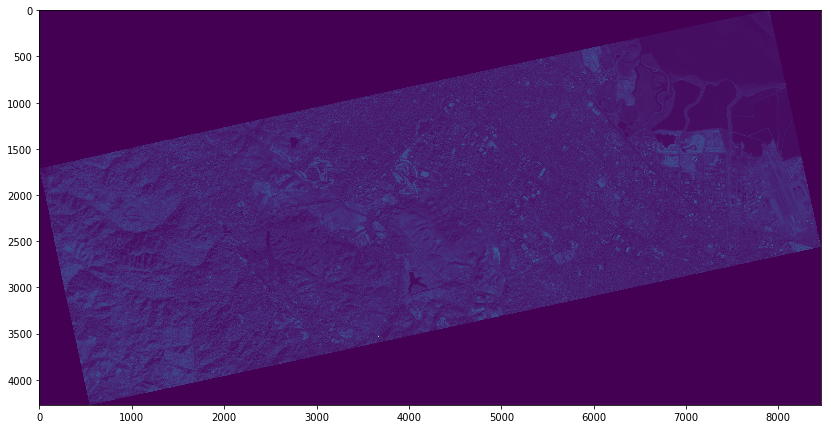

In [39]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.imshow(f)

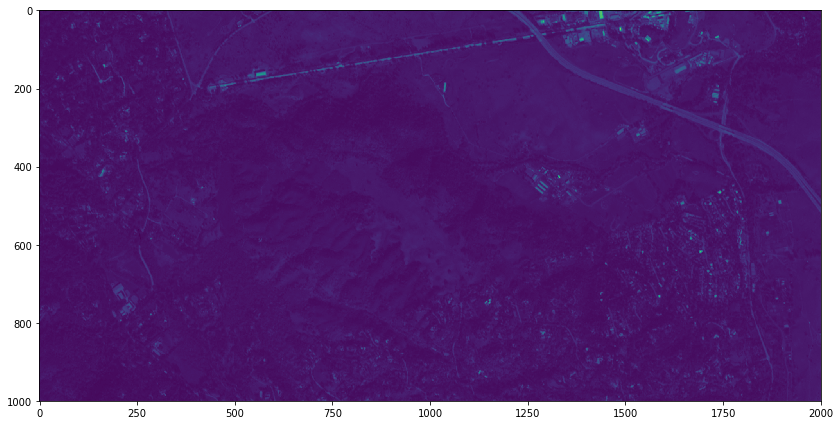

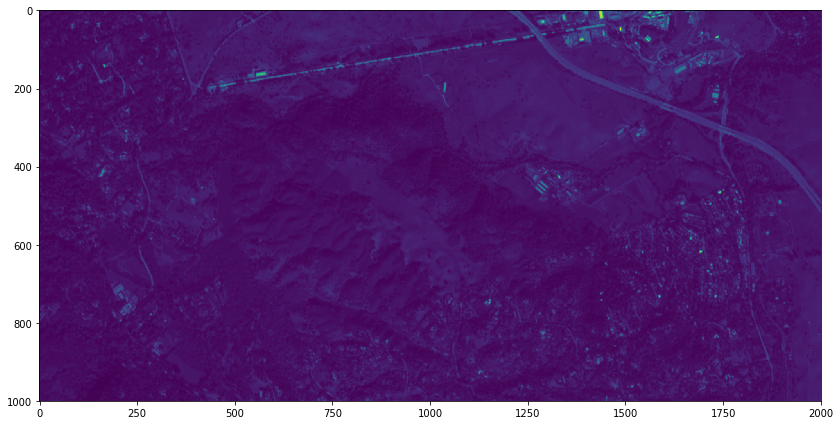

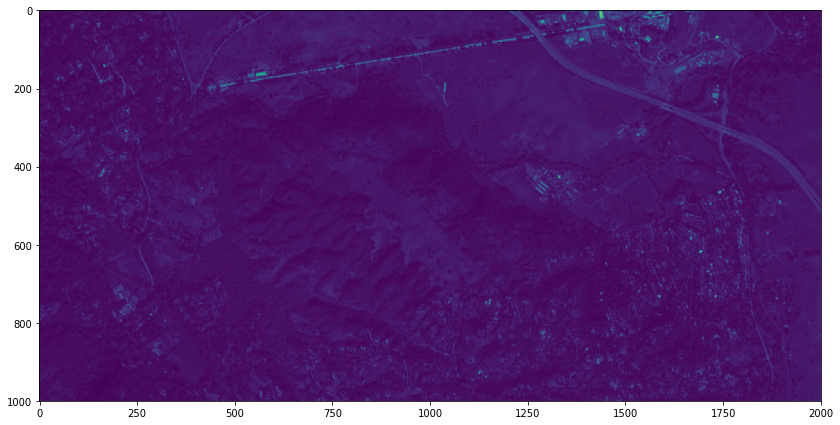

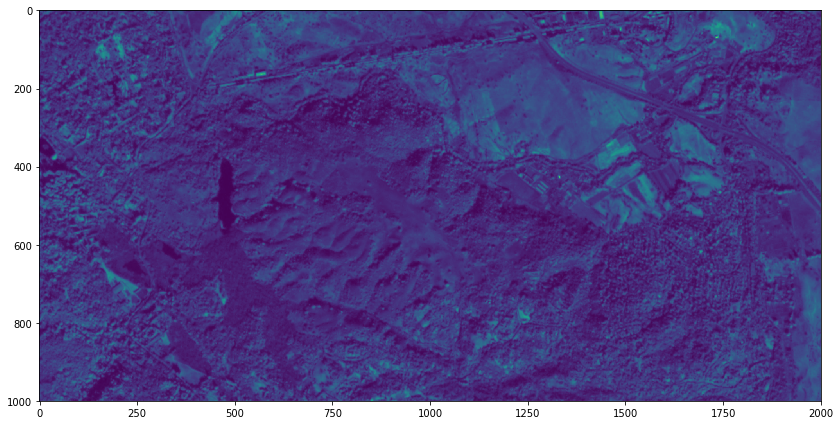

In [38]:
for i in [r,g,b,f]:
    fig, ax = plt.subplots(1,1, figsize=(14,8))
    ax.imshow(i[2000:3000, 2000:4000])

In [20]:
len(np.nonzero(g)[0]

(array([   0,    0,    0, ..., 4271, 4271, 4271]),
 array([7895, 7896, 7897, ...,  548,  549,  550]))

In [27]:

# Combine arrays in place. Expecting that the sum will
# temporarily exceed the 8-bit integer range, initialize it as
# a 64-bit float (the numpy default) array. Adding other
# arrays to it in-place converts those arrays "up" and
# preserves the type of the total array.
total = np.zeros(r.shape)
for band in [r,g,b]:
    total += band
total /= 3

# Write the product as a raster band to a new 8-bit file. For
# the new file's profile, we start with the meta attributes of
# the source file, but then change the band count to 1, set the
# dtype to uint8, and specify LZW compression.
profile = src.profile
profile.update(dtype=rasterio.uint8, count=1, compress='lzw')

out_path = os.path.join(folder, 'out_test.tif')
with rasterio.open(out_path, 'w', **profile) as dst:
    dst.write(total.astype(rasterio.uint8), 1)

ValueError: can't read closed raster file